# Setup

In [50]:
import os
from pathlib import Path

from PIL import Image
from ultralytics import YOLO

import matplotlib.pyplot as plt
import cv2

In [2]:
root_dir = Path(os.getcwd()).parent

data_dir = root_dir / 'data'
processed_data_dir = data_dir/"1_processed"
yaml_dir = processed_data_dir / "custom_data.yaml"

runs_dir = root_dir / 'runs'

# Training

In [ ]:
train_project = 'project_test' # custom run directory
data_name = "idn_jpn_usa_addit" # for custom run name
pretrained = True

In [24]:
# create custom run directory
custom_project_dir = root_dir / "notebooks" / train_project
if not os.path.exists(custom_project_dir):
    os.makedirs(custom_project_dir)

# get the list of run
runs_list = os.listdir(custom_project_dir)

# create custom run name
if pretrained
if not runs_list:
    train_name = f"0_{data_name}"
else:
    last_run = max([int(order.split('_')[0]) for order in runs_list])
    train_name = f"{last_run}_{data_name}"

In [27]:
# Load a model
model = YOLO(
    "yolov8n.pt"
    )

# Use the model
results = model.train(
    data=yaml_dir,
    epochs=3,
    batch=8,
    # patience=10,
    project=train_project,
    name=train_name
    )  # train the model

New https://pypi.org/project/ultralytics/8.0.203 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.200  Python-3.9.18 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=d:\0_amri_local\14_pupr_roaddamagedetection\yolov8_custom\data\1_processed\custom_data.yaml, epochs=3, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=project_test, name=0_idn_jpn_usa_addit, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

# Inferencing

## Image

In [30]:
# Load a pretrained YOLOv8n model
best_model = YOLO(custom_project_dir / train_name / "weights" / "best.pt")

In [41]:
# glob.glob(str(processed_data_dir / "test"))
test_data = [str(processed_data_dir / "test" / file) for file in os.listdir(processed_data_dir / "test")]

In [42]:
# Run inference on an image
results = best_model(
    source = test_data
)  # list of 1 Results object


0: 640x640 1 retak_buaya, 1: 640x640 2 retak_memanjangs, 2: 640x640 1 retak_memanjang, 1 retak_melintang, 3: 640x640 (no detections), 4: 640x640 (no detections), 5: 640x640 (no detections), 6: 640x640 (no detections), 7: 640x640 1 retak_buaya, 8: 640x640 (no detections), 9: 640x640 1 retak_buaya, 10: 640x640 (no detections), 11: 640x640 (no detections), 12: 640x640 (no detections), 13: 640x640 3 retak_memanjangs, 1 retak_melintang, 14: 640x640 2 retak_memanjangs, 1 retak_melintang, 15: 640x640 1 retak_memanjang, 16: 640x640 (no detections), 253.3ms
Speed: 4.6ms preprocess, 14.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


In [48]:
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image

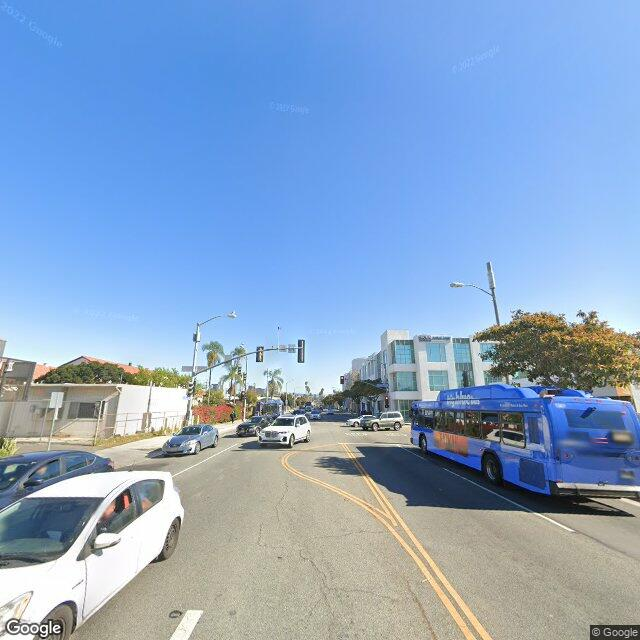

In [49]:
im

## Video

In [ ]:
video_path = r"D:\0_amri_local\14_pupr_roaddamagedetection\data\PUPR\Banten\21017 R1.mp4"
video_path_out = r"D:\0_amri_local\14_pupr_roaddamagedetection\yolov8_custom\notebooks\out.mp4"

cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

In [ ]:
threshold = 0.5

while ret:

    results = best_model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()